In [15]:
words = open('swedish_names.txt', 'r', encoding='utf-8').read().splitlines()
#words = [w.lower() for w in words if len(w) > 2] # Remove 2< longs words
#words = [w for w in words if w.isascii() and w.isalpha()] # Remove names with åäö or that contains bad things
#words = [w for w in words if '.' not in w]
print(words[-3:])
print(len(words))

['Åsa', 'Åse', 'Ängla']
16626


In [16]:
letters = sorted(list(set(''.join(words)))) # Get all individual letters sorted, should be alphabet (if all letters are once included in our names)
num_of_unique_letters = len(letters) + 1 # Add 1 for '.' our special char
stoi = {s:i+1 for i,s in enumerate(letters)} # Create a mapping from a char to a int in order to index in tensor
stoi['.'] = 0 # Add . as a special char
itos = {i:s for s,i in stoi.items()} # Create the mapping in reverse
print(num_of_unique_letters)
print(letters)
itos

84
[' ', "'", '-', '.', ':', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'Á', 'Ä', 'Å', 'É', 'Ó', 'Ö', 'Ø', 'Ü', 'à', 'á', 'ã', 'ä', 'å', 'æ', 'ç', 'è', 'é', 'ë', 'í', 'ï', 'ó', 'ô', 'ö', 'ø', 'ú', 'ü']


{1: ' ',
 2: "'",
 3: '-',
 0: '.',
 5: ':',
 6: 'A',
 7: 'B',
 8: 'C',
 9: 'D',
 10: 'E',
 11: 'F',
 12: 'G',
 13: 'H',
 14: 'I',
 15: 'J',
 16: 'K',
 17: 'L',
 18: 'M',
 19: 'N',
 20: 'O',
 21: 'P',
 22: 'Q',
 23: 'R',
 24: 'S',
 25: 'T',
 26: 'U',
 27: 'V',
 28: 'W',
 29: 'X',
 30: 'Y',
 31: 'Z',
 32: 'a',
 33: 'b',
 34: 'c',
 35: 'd',
 36: 'e',
 37: 'f',
 38: 'g',
 39: 'h',
 40: 'i',
 41: 'j',
 42: 'k',
 43: 'l',
 44: 'm',
 45: 'n',
 46: 'o',
 47: 'p',
 48: 'q',
 49: 'r',
 50: 's',
 51: 't',
 52: 'u',
 53: 'v',
 54: 'w',
 55: 'x',
 56: 'y',
 57: 'z',
 58: 'Á',
 59: 'Ä',
 60: 'Å',
 61: 'É',
 62: 'Ó',
 63: 'Ö',
 64: 'Ø',
 65: 'Ü',
 66: 'à',
 67: 'á',
 68: 'ã',
 69: 'ä',
 70: 'å',
 71: 'æ',
 72: 'ç',
 73: 'è',
 74: 'é',
 75: 'ë',
 76: 'í',
 77: 'ï',
 78: 'ó',
 79: 'ô',
 80: 'ö',
 81: 'ø',
 82: 'ú',
 83: 'ü'}

In [17]:
def build_data(words, nChars):
    x, y = [], []
    for w in words:
        chs = list('.'*nChars + w + ".")
        chs = [stoi[c] for c in chs]
        for i in range(len(chs)-nChars):
            x.append(chs[i:i+nChars])
            y.append(chs[i+nChars])
    return (x,y)

# Example 'zuzanna' becomes training example (.. -> z, ..z -> u, and so on until last nna -> .) and chars are converted to the ints

nChars = 10
print(words[-1:])
print(build_data(words[-1:], nChars))


['Ängla']
([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 59], [0, 0, 0, 0, 0, 0, 0, 0, 59, 45], [0, 0, 0, 0, 0, 0, 0, 59, 45, 38], [0, 0, 0, 0, 0, 0, 59, 45, 38, 43], [0, 0, 0, 0, 0, 59, 45, 38, 43, 32]], [59, 45, 38, 43, 32, 0])


In [18]:
import torch
import torch.nn.functional as F
import random
import matplotlib.pyplot as plt
%matplotlib inline

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
torch.cuda.get_device_name(0)

cuda:0


'NVIDIA GeForce RTX 3070 Ti'

In [19]:
random.seed(3)
random.shuffle(words)
trainIdx = int(0.8*len(words))
valIdx = int(0.9*len(words))

xTrain, yTrain = build_data(words[0:trainIdx], nChars)
xTrain = torch.tensor(xTrain)
yTrain = torch.tensor(yTrain)

xVal, yVal = build_data(words[trainIdx:valIdx], nChars)
xVal = torch.tensor(xVal)
yVal = torch.tensor(yVal)

xTest, yTest = build_data(words[valIdx:], nChars)
xTest = torch.tensor(xTest)
yTest = torch.tensor(yTest)

In [20]:
g = torch.Generator().manual_seed(3)

# Look up table, can also be seen as the first layer to our network
nC = 5
C = torch.randn((num_of_unique_letters, nC), generator=g)

# Size of hidden layer
nHiddenN = 100
W1 = torch.randn((nChars*nC, nHiddenN), generator=g)
b1 = torch.randn(nHiddenN, generator=g)
W2 = torch.randn((nHiddenN, num_of_unique_letters), generator=g)
b2 = torch.randn(num_of_unique_letters, generator=g)

parameters = [W1, b1, W2, b2, C]
for p in parameters:
    p.requires_grad = True
    
sum(p.nelement() for p in parameters)
trL = []
vaL = []
vaI = 0
teL = []
lr = 0.1

We could also add some search for the best hyper parameters but after testing a few different combinations it seems the architecture of the network is more important to improve on.

Last va loss: 3.1771490160843725
Last tr loss: 3.051055249435823


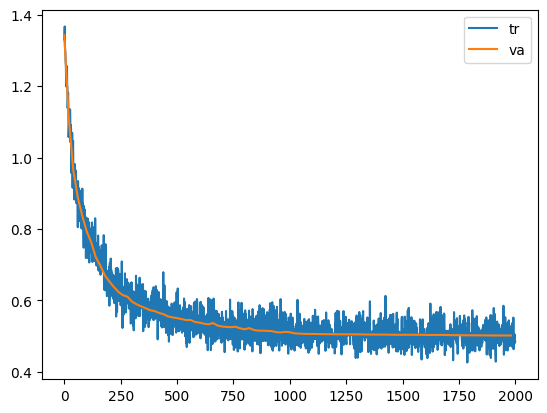

In [21]:
iters = 2000
for i in range(iters):
    # Get mini batch idx
    mIdx = torch.randint(0, xTrain.shape[0], (128,))
    
    # Forward
    emb = C[xTrain[mIdx]]
    h = torch.tanh(emb.view(-1, nChars*nC) @ W1 + b1) # We use view to effiently "squash" the look up table's dimentions 
                                                      # in order to have them ass input to our network
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, yTrain[mIdx])
    trL.append(loss.log10().item())
    
    # Backward
    for p in parameters:
        p.grad = None
    loss.backward()

    # Update
    if i == iters/2:
        lr = lr/10
    for p in parameters:
        p.data += -lr * p.grad
    
    
    # Calulate Validation acc
    if (i % (iters/100)) == 0:
        emb = C[xVal]
        h = torch.tanh(emb.view(-1, nChars*nC) @ W1 + b1) # We use view to effiently "squash" the look up table's dimentions 
                                                          # in order to have them ass input to our network
        logits = h @ W2 + b2
        vaL.append(F.cross_entropy(logits, yVal).log10().item())
        vaI += 1

plt.plot([i for i in range(len(trL))], trL, label='tr')
plt.plot([i*(iters/100) for i in range(vaI)], vaL, label='va')
plt.legend()
print(f'Last va loss: {10**vaL[-1]}')
print(f'Last tr loss: {10**trL[-1]}')

In [22]:
# Calulate test loss
emb = C[xTest]
h = torch.tanh(emb.view(-1, nChars*nC) @ W1 + b1) # We use view to effiently "squash" the look up table's dimentions 
                                                  # in order to have them ass input to our network
logits = h @ W2 + b2
F.cross_entropy(logits, yTest).item()

3.1642706394195557

Of course these losses cannot be directly compared to the previous work in the "Simple counts and NN.ipynb" but by looking at the names we produce can at least compare them without human interpretations.

In [23]:
for i in range(10):
    out = []
    context = [stoi[c] for c in list('.'*nChars)]
    while True:
        # Forward
        emb = C[torch.tensor(context)]
        h = torch.tanh(emb.view(-1, nChars*nC) @ W1 + b1) # We use view to effiently "squash" the look up table's dimentions 
                                                          # in order to have them ass input to our network
        logits = h @ W2 + b2
        probs = F.softmax(logits, dim=1)
        ix = torch.multinomial(probs, num_samples=1, generator=g).item()
        context = context[1:] + [ix]
        out.append(ix)
        if ix == 0:
            break
            
    print(''.join(itos[i] for i in out))

Co.
zihiiro.
Poiines.
Saeno.
S.
KaVn.
Tnfsa.
Rarr.
Oeykiöt.
Hnalaayn.


As we can see this method produces better names than our first attempt of both Simple counts and NN with only 1 nC and character encoding into more dimensions (instead of just numbers).

In [24]:
if nC == 2:
    # visualize dimensions 0 and 1 of the embedding matrix C for all characters
    plt.figure(figsize=(8,8))
    plt.scatter(C[:,0].data, C[:,1].data, s=200)
    print(itos)
    for i in range(C.shape[0]):
        plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color='white')
    plt.grid('minor')
else:
    print("Cant visualize with more than 2 dims")

Cant visualize with more than 2 dims
